Exploratory Data Analysis
https://nces.ed.gov/ipeds/use-the-data

Authors:
- Tina Jin
- Virginia Weston
- Jeffrey Bradley
- Taylor Tucker

Imports

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import scipy as sp
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, confusion_matrix
import itertools


Read data

In [15]:
df = pd.read_csv("./cleaned_data_final.csv")
df.drop(["Unnamed: 0"], axis = 1,inplace = True)
columns = df.columns
df.head()

Number of Bachelor's Degrees  Percent Financial Aid  Average Amount of Aid  \
0                         208.0                  100.0                32400.0   
1                         310.0                  100.0                40855.0   
2                         398.0                  100.0                39796.0   
3                         382.0                  100.0                38689.0   
4                          61.0                   97.0                10055.0   

   Retention Rate  Enrollment  Percent Women  Percent In State  \
0            79.0         996           99.0              59.0   
1            75.0        1533           54.0              66.0   
2            68.0        1912           60.0              53.0   
3            82.0        1771           56.0              50.0   
4            37.0         698           45.0              64.0   

   Percent Out of State  Percent Foreign  Percent Unknown  ...  \
0                  36.0              4.0              0.0  ...   
1                  32.0              1.0              0.0  ...   
2                  46.0              1.0              0.0  ...   
3                  45.0              4.0              0.0  ...   
4                  34.0              0.0              2.0  ...   

   Percent Awarded  Total Staff  Instructional Staff  SA Staff  \
0             66.0        357.0                105.0      56.0   
1             61.0        435.0                132.0      21.0   
2             48.0        355.0                123.0      17.0   
3             70.0        426.0                160.0      41.0   
4             10.0        115.0                 41.0       4.0   

   Librarian Staff  Percent Books  Percent Digital  Percent Admitted  \
0             62.0             41               12         70.000000   
1             27.0             37               54         68.000000   
2             21.0             28               13         62.000000   
3             50.0             27               46         64.000000   
4              7.0             20               76         59.567442   

   Percent Men  Total Price  
0          1.0      55625.0  
1         46.0      59470.0  
2         40.0      60636.0  
3         44.0      63180.0  
4         55.0      23170.0  

[5 rows x 21 columns]

Scatter Plot Matrix for Visualization of Data and Initial Linear Relationships

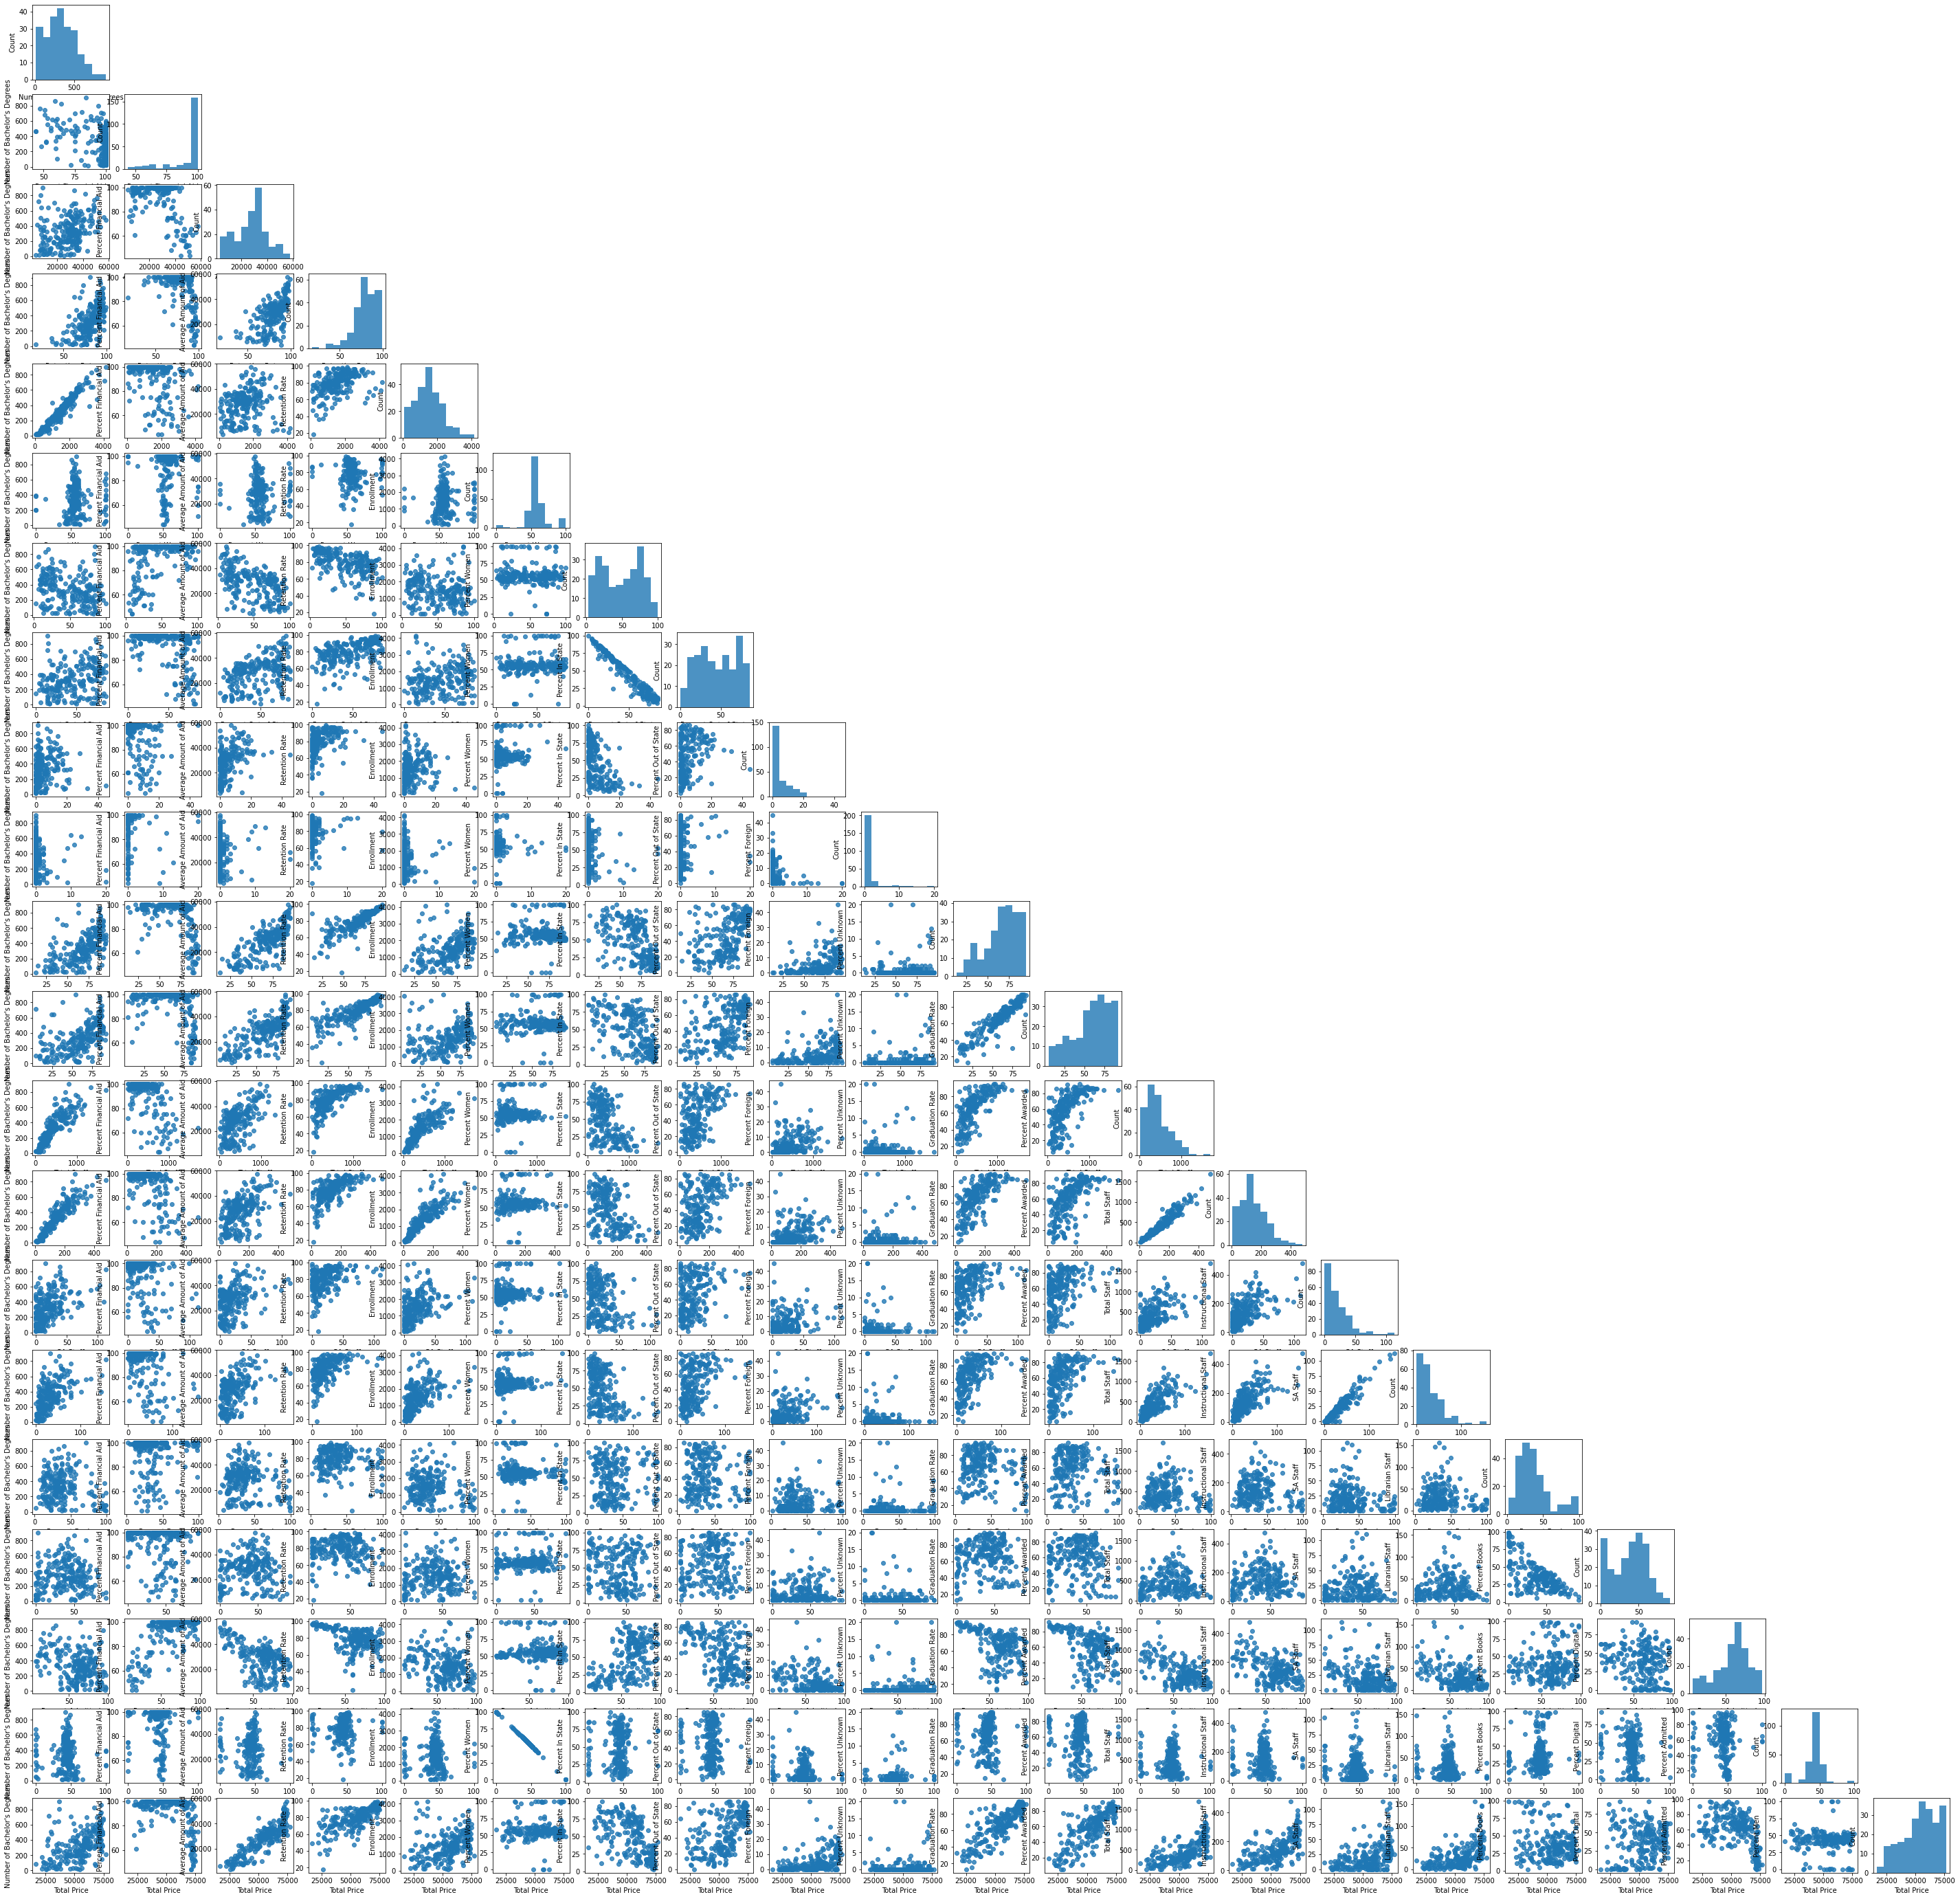

In [16]:
scatterplotmatrix(df[columns].values, figsize=(50, 50), names=columns, alpha=0.8)
plt.tight_layout()
plt.savefig("./figs/scatterplot_matrix.png")
plt.show()

Correlation Heat Map for easier analysis of linear relationships

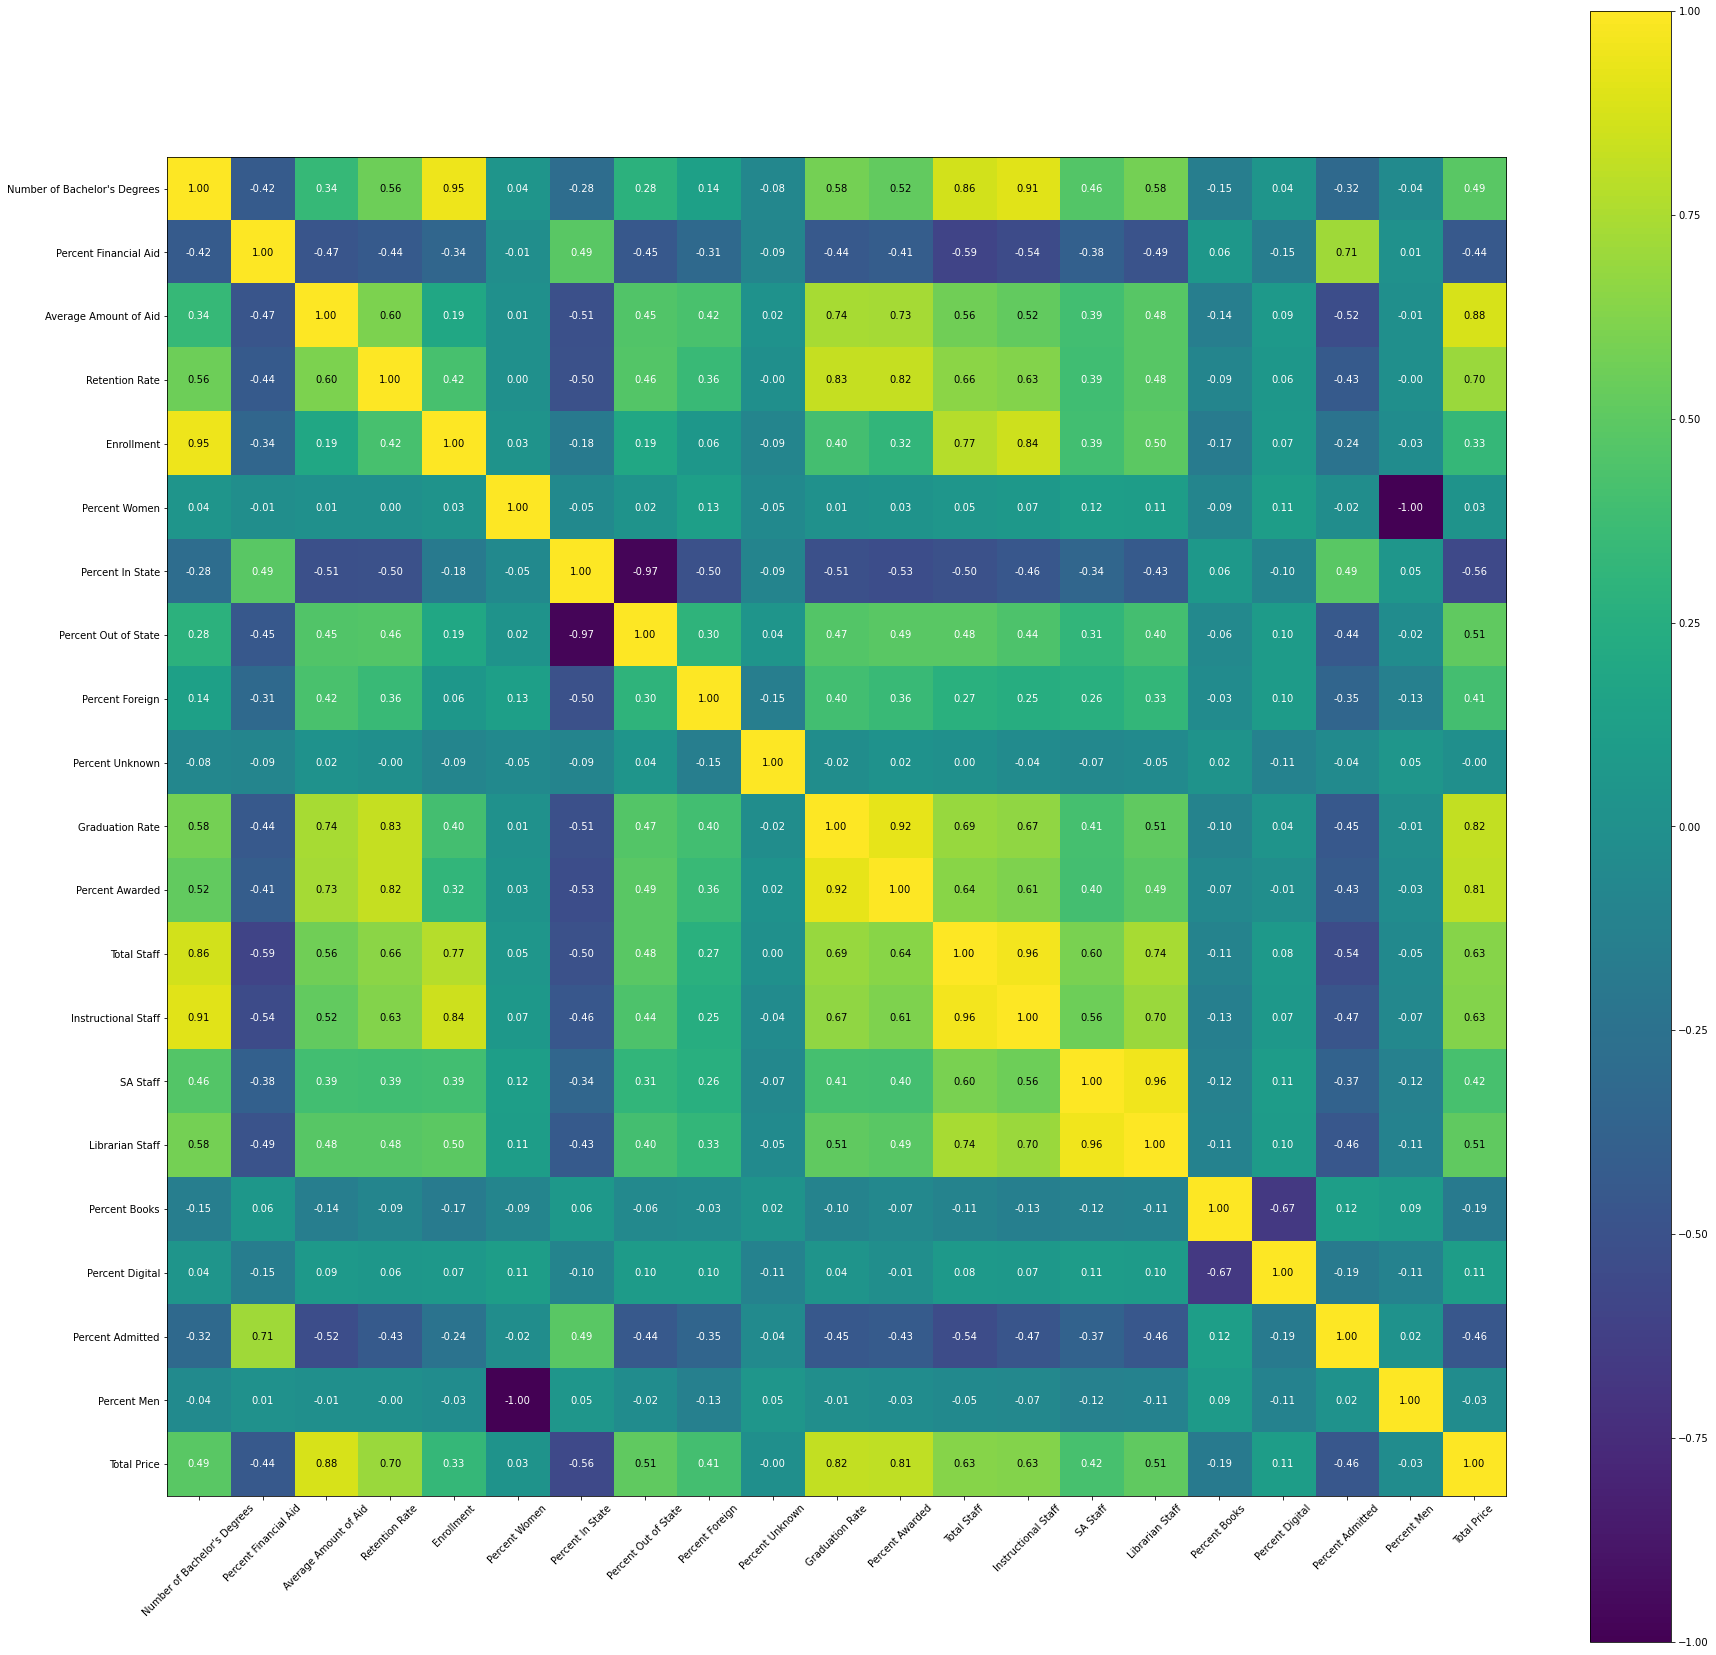

In [17]:
corrmap = np.corrcoef(df[columns].values.T)
hmap = heatmap(corrmap, row_names=columns, column_names=columns, figsize=(30, 30))
plt.savefig("./figs/heatmap.png")
plt.show()

The bottom row of the matrix shows the linear relationships between our features and potential target variable, Total Price. 
Intial strong linear relationships are shown with Average Amount of Aid, Retention Rate, Graduation Rate, and Percent Awared [Aid]

We want to see how different normalizations effect the distrution of our data so we can start considering which ones may be effective for our model.
We will start by looking at the intitial distributions

With 20 features and our target we will be looking at a 7 x 3 matrix

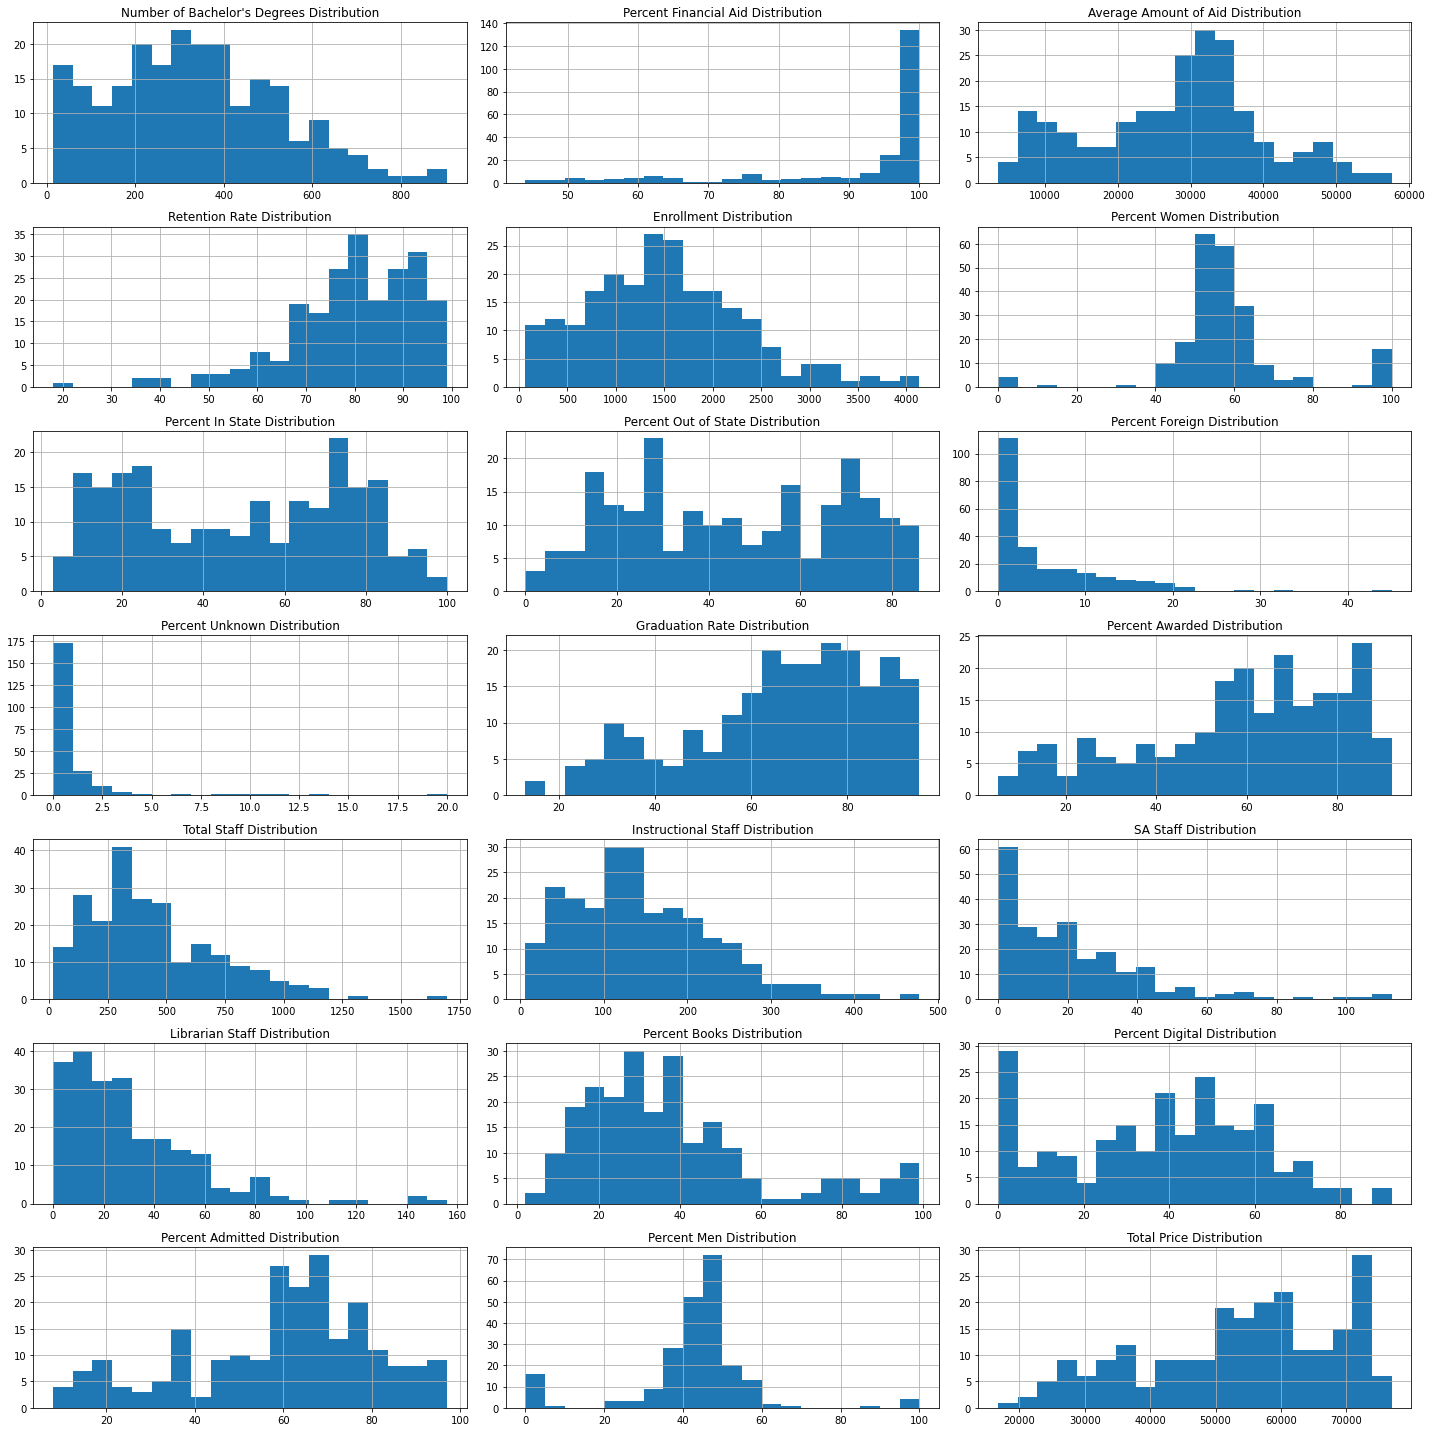

<Figure size 432x288 with 0 Axes>

In [89]:
fig=plt.figure(figsize=(20,20))
for key,column in enumerate(df.columns):
    #print(key)
    ax = fig.add_subplot(7,3,key+1)
    df[column].hist(bins=20,ax=ax)
    ax.set_title(column + " Distribution")
fig.tight_layout()
plt.show()
plt.savefig("./figs/OriginalDistributions.png")

Now lets see how Standard Scaler affects our distributions. We will apply this to all our data including our target value.

In [39]:
x = df
SS = StandardScaler()
xSS = SS.fit_transform(x)
dfSS = pd.DataFrame(xSS)
dfSS.columns = columns

In [57]:
dfSS.head()

Number of Bachelor's Degrees  Percent Financial Aid  Average Amount of Aid  \
0                     -0.640729               0.598976               0.360393   
1                     -0.108354               0.598976               1.066996   
2                      0.350950               0.598976               0.978493   
3                      0.267440               0.598976               0.885979   
4                     -1.407976               0.393926              -1.507027   

   Retention Rate  Enrollment  Percent Women  Percent In State  \
0       -0.026913   -0.649981       2.653749          0.392306   
1       -0.333518    0.015369      -0.230761          0.654788   
2       -0.870076    0.484956       0.153841          0.167322   
3        0.203040    0.310255      -0.102560          0.054830   
4       -3.246262   -1.019207      -0.807663          0.579794   

   Percent Out of State  Percent Foreign  Percent Unknown  ...  \
0             -0.396349        -0.185235        -0.299892  ...   
1             -0.564531        -0.644917        -0.299892  ...   
2              0.024106        -0.644917        -0.299892  ...   
3             -0.017939        -0.185235        -0.299892  ...   
4             -0.480440        -0.798144         0.489298  ...   

   Percent Awarded  Total Staff  Instructional Staff  SA Staff  \
0         0.332021    -0.303204            -0.472497  1.703887   
1         0.108814    -0.027676            -0.158296  0.013369   
2        -0.471525    -0.310269            -0.263029 -0.179833   
3         0.510587    -0.059468             0.167543  0.979379   
4        -2.167900    -1.158049            -1.217270 -0.807740   

   Librarian Staff  Percent Books  Percent Digital  Percent Admitted  \
0         1.173610       0.148130        -1.147439      4.876310e-01   
1        -0.139708      -0.029389         0.705799      3.941485e-01   
2        -0.364848      -0.428807        -1.103314      1.137009e-01   
3         0.723330      -0.473187         0.352802      2.071834e-01   
4        -0.890175      -0.783846         1.676543     -3.321167e-16   

   Percent Men  Total Price  
0    -2.653749     0.119979  
1     0.230761     0.382281  
2    -0.153841     0.461825  
3     0.102560     0.635375  
4     0.807663    -2.094076  

[5 rows x 21 columns]

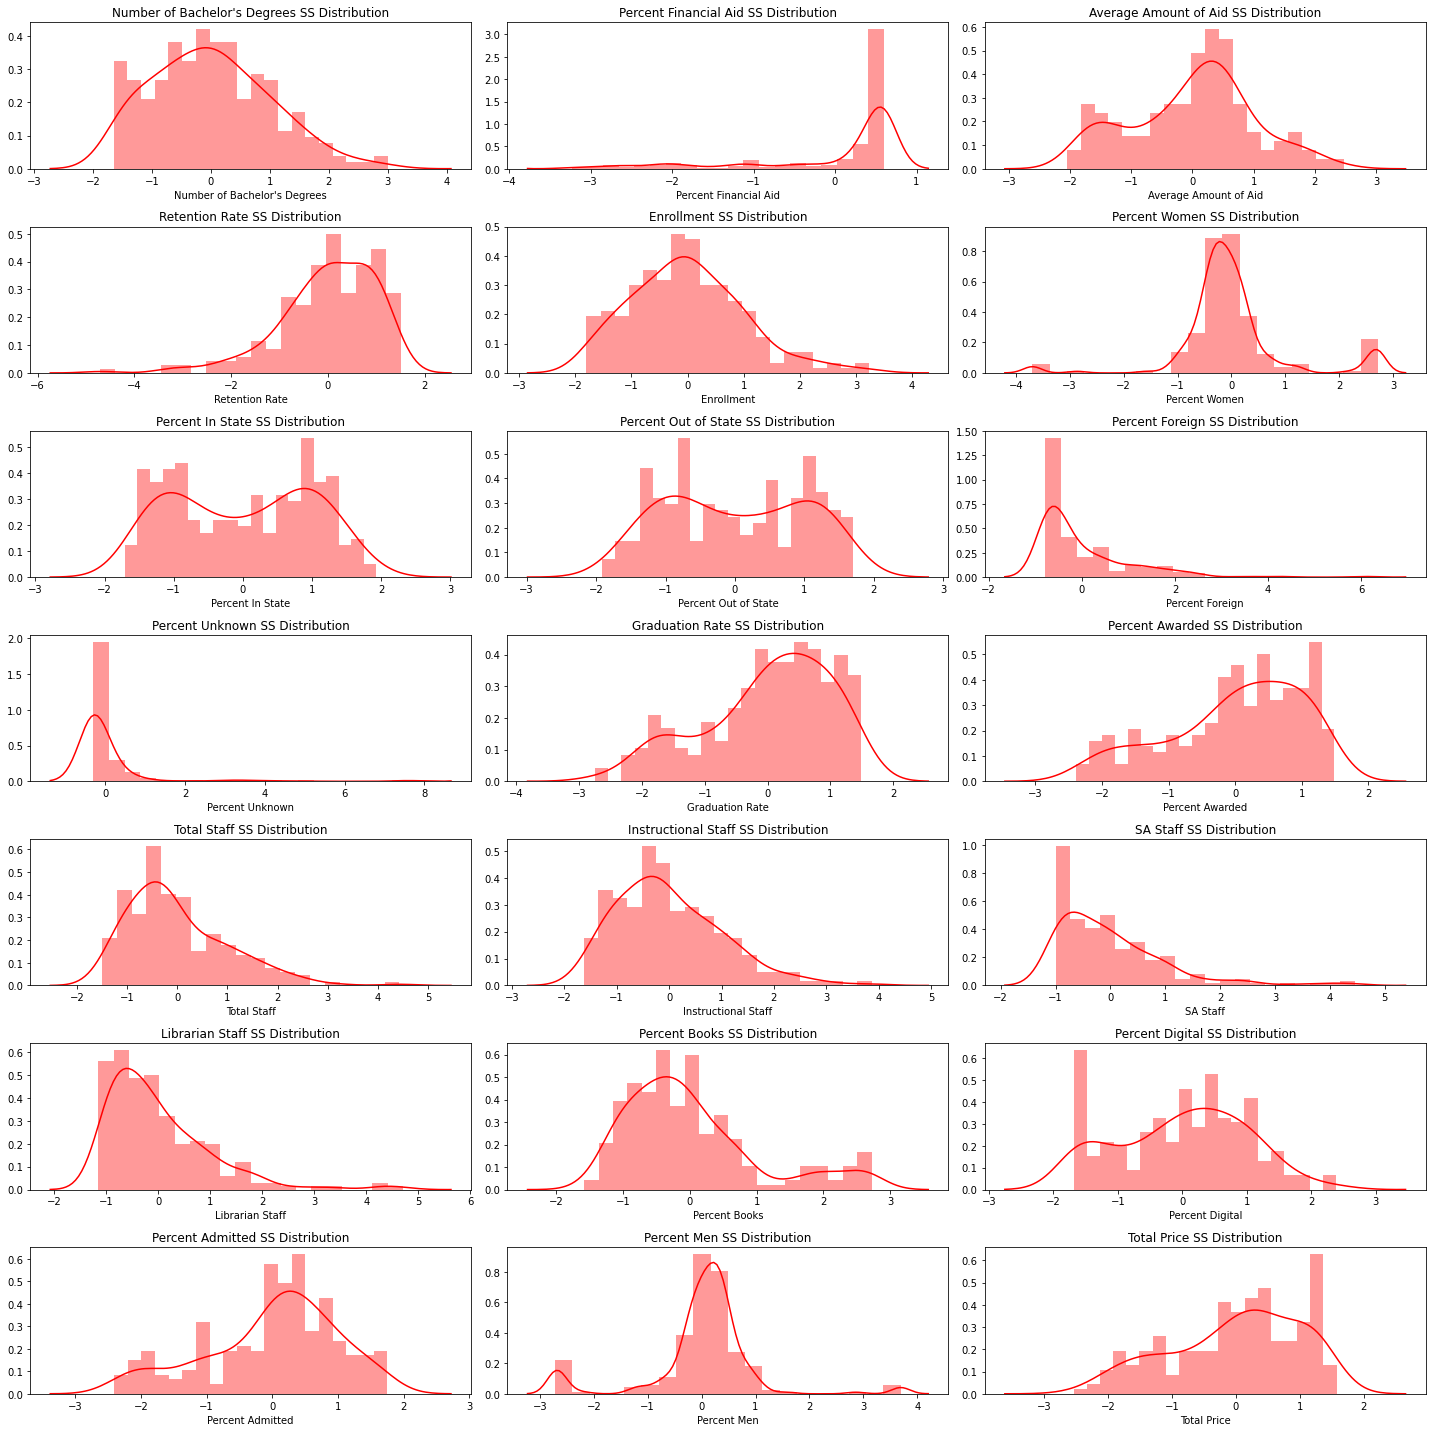

<Figure size 432x288 with 0 Axes>

In [90]:
fig=plt.figure(figsize=(20,20))
for key,column in enumerate(x.columns):
    #print(key)
    ax = fig.add_subplot(7,3,key+1)
    #xSS[column].hist(bins=20,ax=ax)
    sns.distplot(dfSS[column],bins = 20, color = 'r')
    #df[column].hist(bins=20,ax=ax, color = 'r')
    ax.set_title(column + " SS Distribution")
fig.tight_layout()
plt.show()
plt.savefig("./figs/StandardScalerDistributions.png")

As expected the Standard Scaler normalization made all the data centered around 0. This could be helpful if one feature proves overpowering in the model.

Lets try a robust scaler to see what it does to outliers

In [62]:
x = df
RBS = RobustScaler()
xRBS = RBS.fit_transform(x)
dfRBS = pd.DataFrame(xRBS)
dfRBS.columns = columns
dfRBS.head()

Number of Bachelor's Degrees  Percent Financial Aid  Average Amount of Aid  \
0                     -0.416974                    0.1               0.162757   
1                     -0.040590                    0.1               0.718313   
2                      0.284133                    0.1               0.648729   
3                      0.225092                    0.1               0.575991   
4                     -0.959410                   -0.2              -1.305473   

   Retention Rate  Enrollment  Percent Women  Percent In State  \
0       -0.117647   -0.455315            4.4          0.183673   
1       -0.352941    0.049859           -0.1          0.326531   
2       -0.764706    0.406397            0.5          0.061224   
3        0.058824    0.273754            0.1          0.000000   
4       -2.588235   -0.735654           -1.0          0.285714   

   Percent Out of State  Percent Foreign  Percent Unknown  ...  \
0             -0.209302         0.142857              0.0  ...   
1             -0.302326        -0.285714              0.0  ...   
2              0.023256        -0.285714              0.0  ...   
3              0.000000         0.142857              0.0  ...   
4             -0.255814        -0.428571              2.0  ...   

   Percent Awarded  Total Staff  Instructional Staff  SA Staff  \
0         0.133333    -0.027397            -0.215517  1.666667   
1        -0.033333     0.186301             0.017241  0.208333   
2        -0.466667    -0.032877            -0.060345  0.041667   
3         0.266667     0.161644             0.258621  1.041667   
4        -1.733333    -0.690411            -0.767241 -0.500000   

   Librarian Staff  Percent Books  Percent Digital  Percent Admitted  \
0         1.193548       0.333333        -0.823529          0.269231   
1         0.064516       0.166667         0.411765          0.192308   
2        -0.129032      -0.208333        -0.794118         -0.038462   
3         0.806452      -0.250000         0.176471          0.038462   
4        -0.580645      -0.541667         1.058824         -0.132021   

   Percent Men  Total Price  
0         -4.4    -0.023197  
1          0.1     0.145089  
2         -0.5     0.196122  
3         -0.1     0.307467  
4          1.0    -1.443671  

[5 rows x 21 columns]

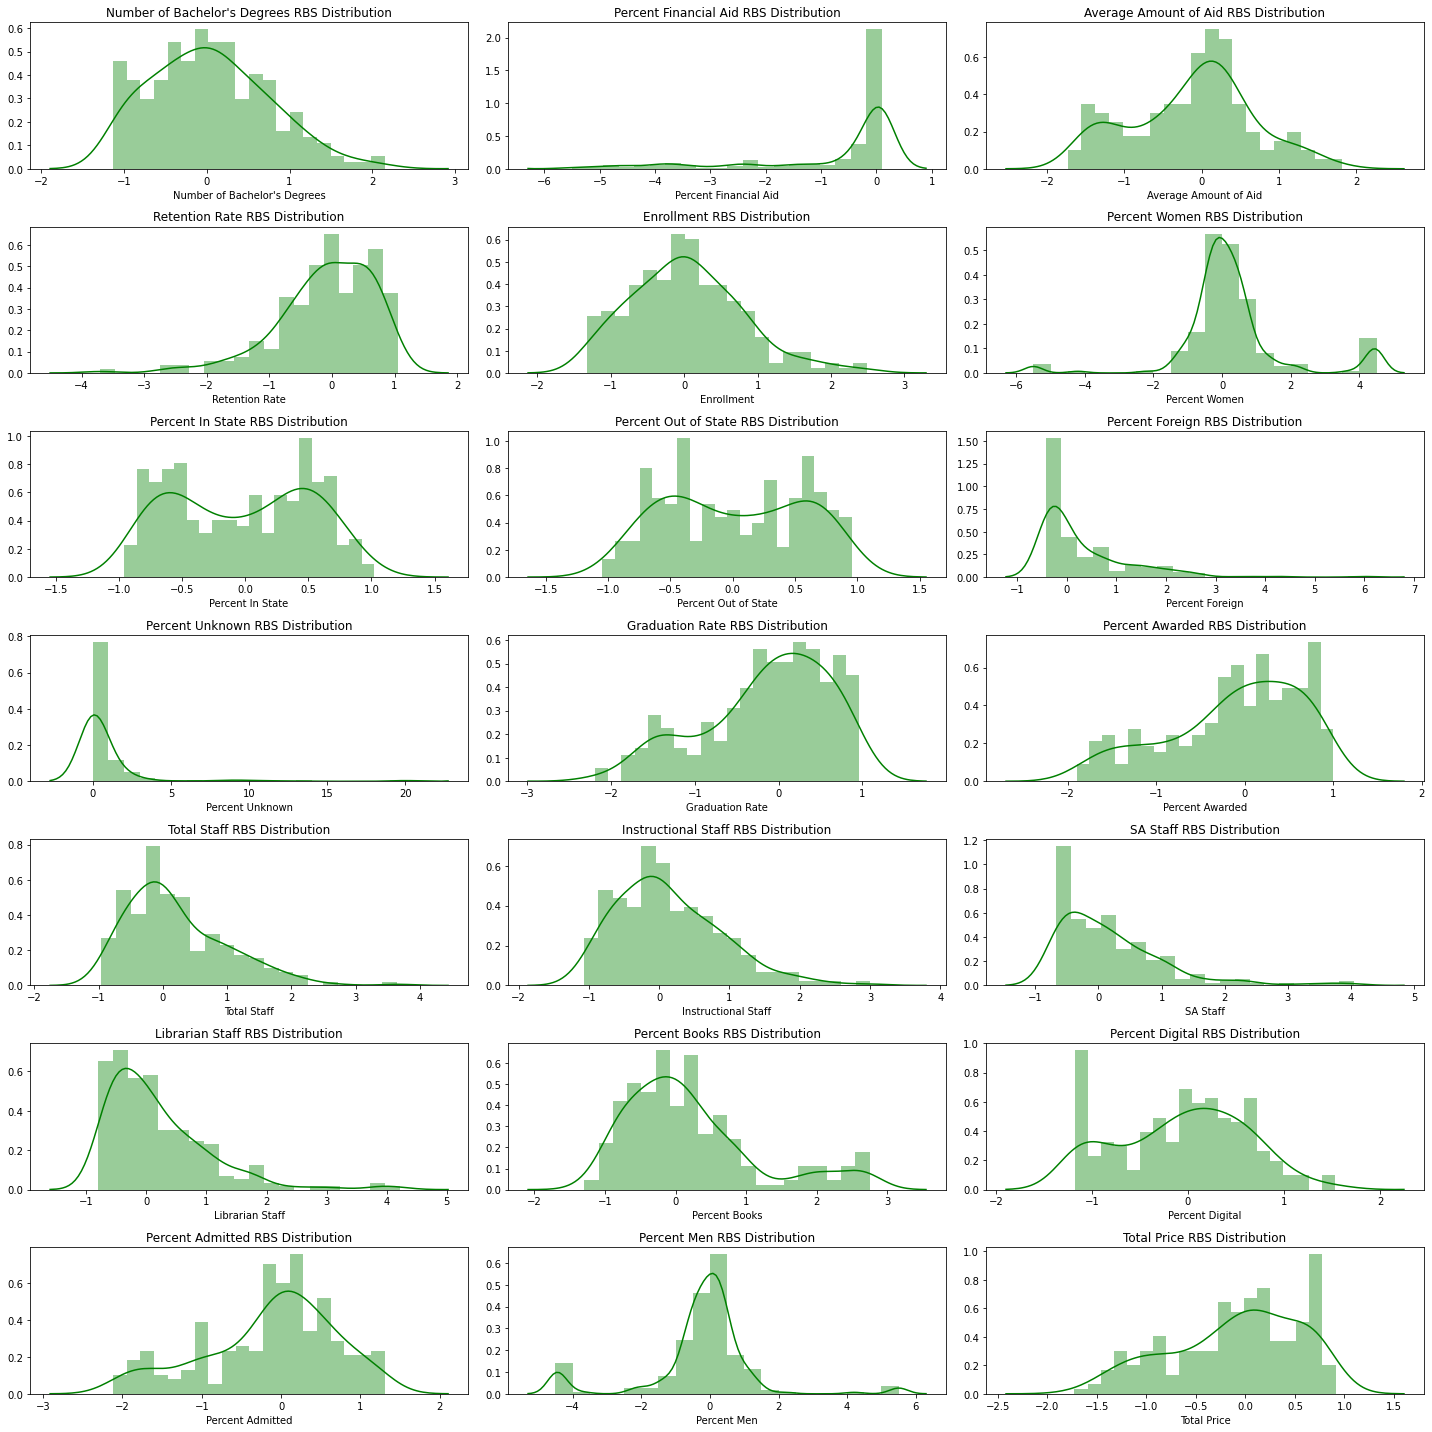

<Figure size 432x288 with 0 Axes>

In [91]:
fig=plt.figure(figsize=(20,20))
for key,column in enumerate(x.columns):
    #print(key)
    ax = fig.add_subplot(7,3,key+1)
    #xSS[column].hist(bins=20,ax=ax)
    sns.distplot(dfRBS[column],bins = 20, color = 'g')
    #df[column].hist(bins=20,ax=ax, color = 'r')
    ax.set_title(column + " RBS Distribution")
fig.tight_layout()
plt.show()
plt.savefig("./figs/RobustScalerDistributions.png")

As you can see, for some variables it made certain peaks shorter or closer to their neighbors and elimated some of the potential outliers near the edges. Such as in percent digital shown below\
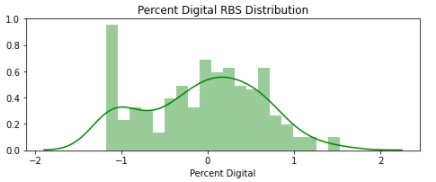 
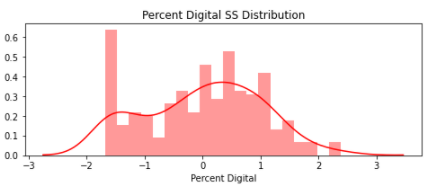

Next we will try the MinMaxScaler

In [69]:
x = df
MMS = MinMaxScaler()
xMMS = MMS.fit_transform(x)
dfMMS = pd.DataFrame(xMMS)
dfMMS.columns = columns
dfMMS.head()

Number of Bachelor's Degrees  Percent Financial Aid  Average Amount of Aid  \
0                      0.217733               1.000000               0.533766   
1                      0.332211               1.000000               0.690027   
2                      0.430976               1.000000               0.670455   
3                      0.413019               1.000000               0.649996   
4                      0.052750               0.946429               0.120795   

   Retention Rate  Enrollment  Percent Women  Percent In State  \
0        0.753086    0.228234           0.99          0.577320   
1        0.703704    0.360305           0.54          0.649485   
2        0.617284    0.453517           0.60          0.515464   
3        0.790123    0.418839           0.56          0.484536   
4        0.234568    0.154943           0.45          0.628866   

   Percent Out of State  Percent Foreign  Percent Unknown  ...  \
0              0.418605         0.088889              0.0  ...   
1              0.372093         0.022222              0.0  ...   
2              0.534884         0.022222              0.0  ...   
3              0.523256         0.088889              0.0  ...   
4              0.395349         0.000000              0.1  ...   

   Percent Awarded  Total Staff  Instructional Staff  SA Staff  \
0         0.701149     0.202501             0.209746  0.495575   
1         0.643678     0.248958             0.266949  0.185841   
2         0.494253     0.201310             0.247881  0.150442   
3         0.747126     0.243597             0.326271  0.362832   
4         0.057471     0.058368             0.074153  0.035398   

   Librarian Staff  Percent Books  Percent Digital  Percent Admitted  \
0         0.397436       0.402062         0.130435          0.696629   
1         0.173077       0.360825         0.586957          0.674157   
2         0.134615       0.268041         0.141304          0.606742   
3         0.320513       0.257732         0.500000          0.629213   
4         0.044872       0.185567         0.826087          0.579409   

   Percent Men  Total Price  
0         0.01     0.646090  
1         0.46     0.709911  
2         0.40     0.729265  
3         0.44     0.771491  
4         0.55     0.107391  

[5 rows x 21 columns]

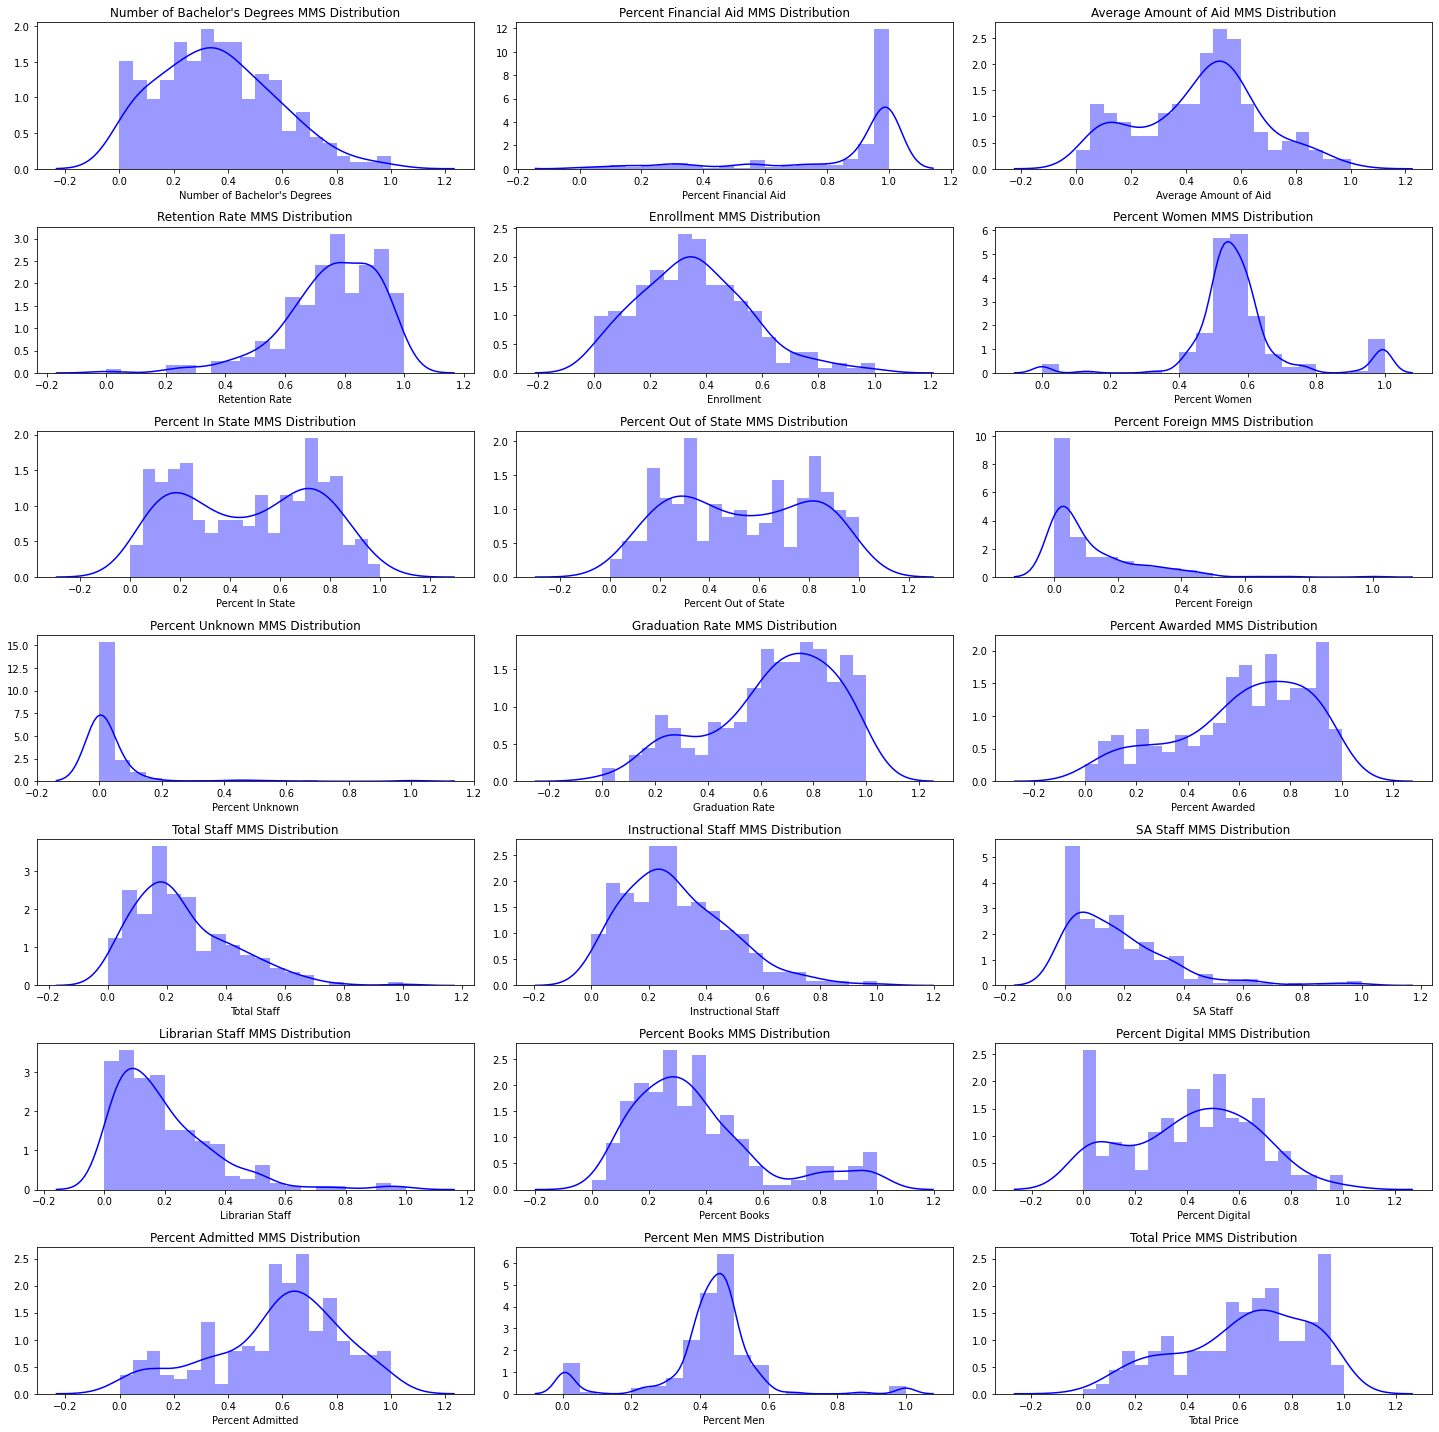

<Figure size 432x288 with 0 Axes>

In [92]:
fig=plt.figure(figsize=(20,20))
for key,column in enumerate(x.columns):
    #print(key)
    ax = fig.add_subplot(7,3,key+1)
    #xSS[column].hist(bins=20,ax=ax)
    sns.distplot(dfMMS[column],bins = 20, color = 'b')
    #dfMMS[column].hist(bins=20,ax=ax, color = 'r')
    ax.set_title(column + " MMS Distribution")
fig.tight_layout()
plt.show()
plt.savefig("./figs/MinMaxScalerDistributions.png")

Again here is an example of Standard Scaler, Robust Scaler, and MinMaxScaler effects.\

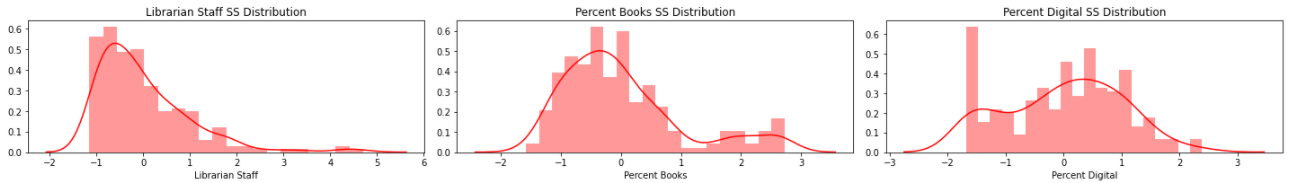
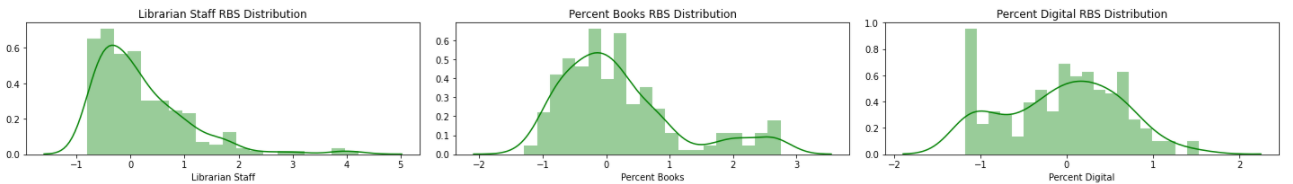
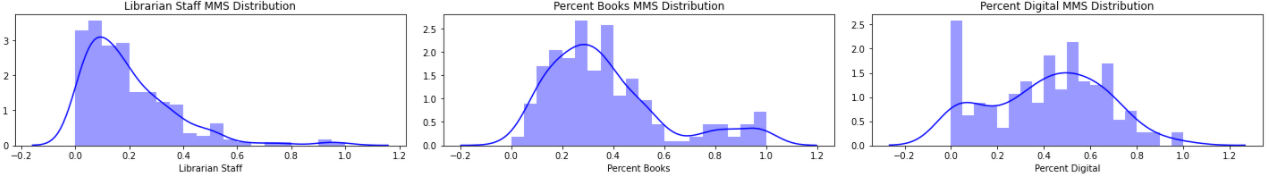

Lastly, we will examine the MaxAbsScaler to see the final effects.

In [85]:
x = df
MAS = MaxAbsScaler()
xMAS = MAS.fit_transform(x)
dfMAS = pd.DataFrame(xMAS)
dfMAS.columns = columns
dfMAS.head()

Number of Bachelor's Degrees  Percent Financial Aid  Average Amount of Aid  \
0                      0.229834                   1.00               0.562236   
1                      0.342541                   1.00               0.708956   
2                      0.439779                   1.00               0.690579   
3                      0.422099                   1.00               0.671369   
4                      0.067403                   0.97               0.174484   

   Retention Rate  Enrollment  Percent Women  Percent In State  \
0        0.797980    0.240929           0.99              0.59   
1        0.757576    0.370827           0.54              0.66   
2        0.686869    0.462506           0.60              0.53   
3        0.828283    0.428399           0.56              0.50   
4        0.373737    0.168844           0.45              0.64   

   Percent Out of State  Percent Foreign  Percent Unknown  ...  \
0              0.418605         0.088889              0.0  ...   
1              0.372093         0.022222              0.0  ...   
2              0.534884         0.022222              0.0  ...   
3              0.523256         0.088889              0.0  ...   
4              0.395349         0.000000              0.1  ...   

   Percent Awarded  Total Staff  Instructional Staff  SA Staff  \
0         0.717391     0.210495             0.219665  0.495575   
1         0.663043     0.256486             0.276151  0.185841   
2         0.521739     0.209316             0.257322  0.150442   
3         0.760870     0.251179             0.334728  0.362832   
4         0.108696     0.067807             0.085774  0.035398   

   Librarian Staff  Percent Books  Percent Digital  Percent Admitted  \
0         0.397436       0.414141         0.130435          0.721649   
1         0.173077       0.373737         0.586957          0.701031   
2         0.134615       0.282828         0.141304          0.639175   
3         0.320513       0.272727         0.500000          0.659794   
4         0.044872       0.202020         0.826087          0.614097   

   Percent Men  Total Price  
0         0.01     0.722900  
1         0.46     0.772870  
2         0.40     0.788023  
3         0.44     0.821085  
4         0.55     0.301116  

[5 rows x 21 columns]

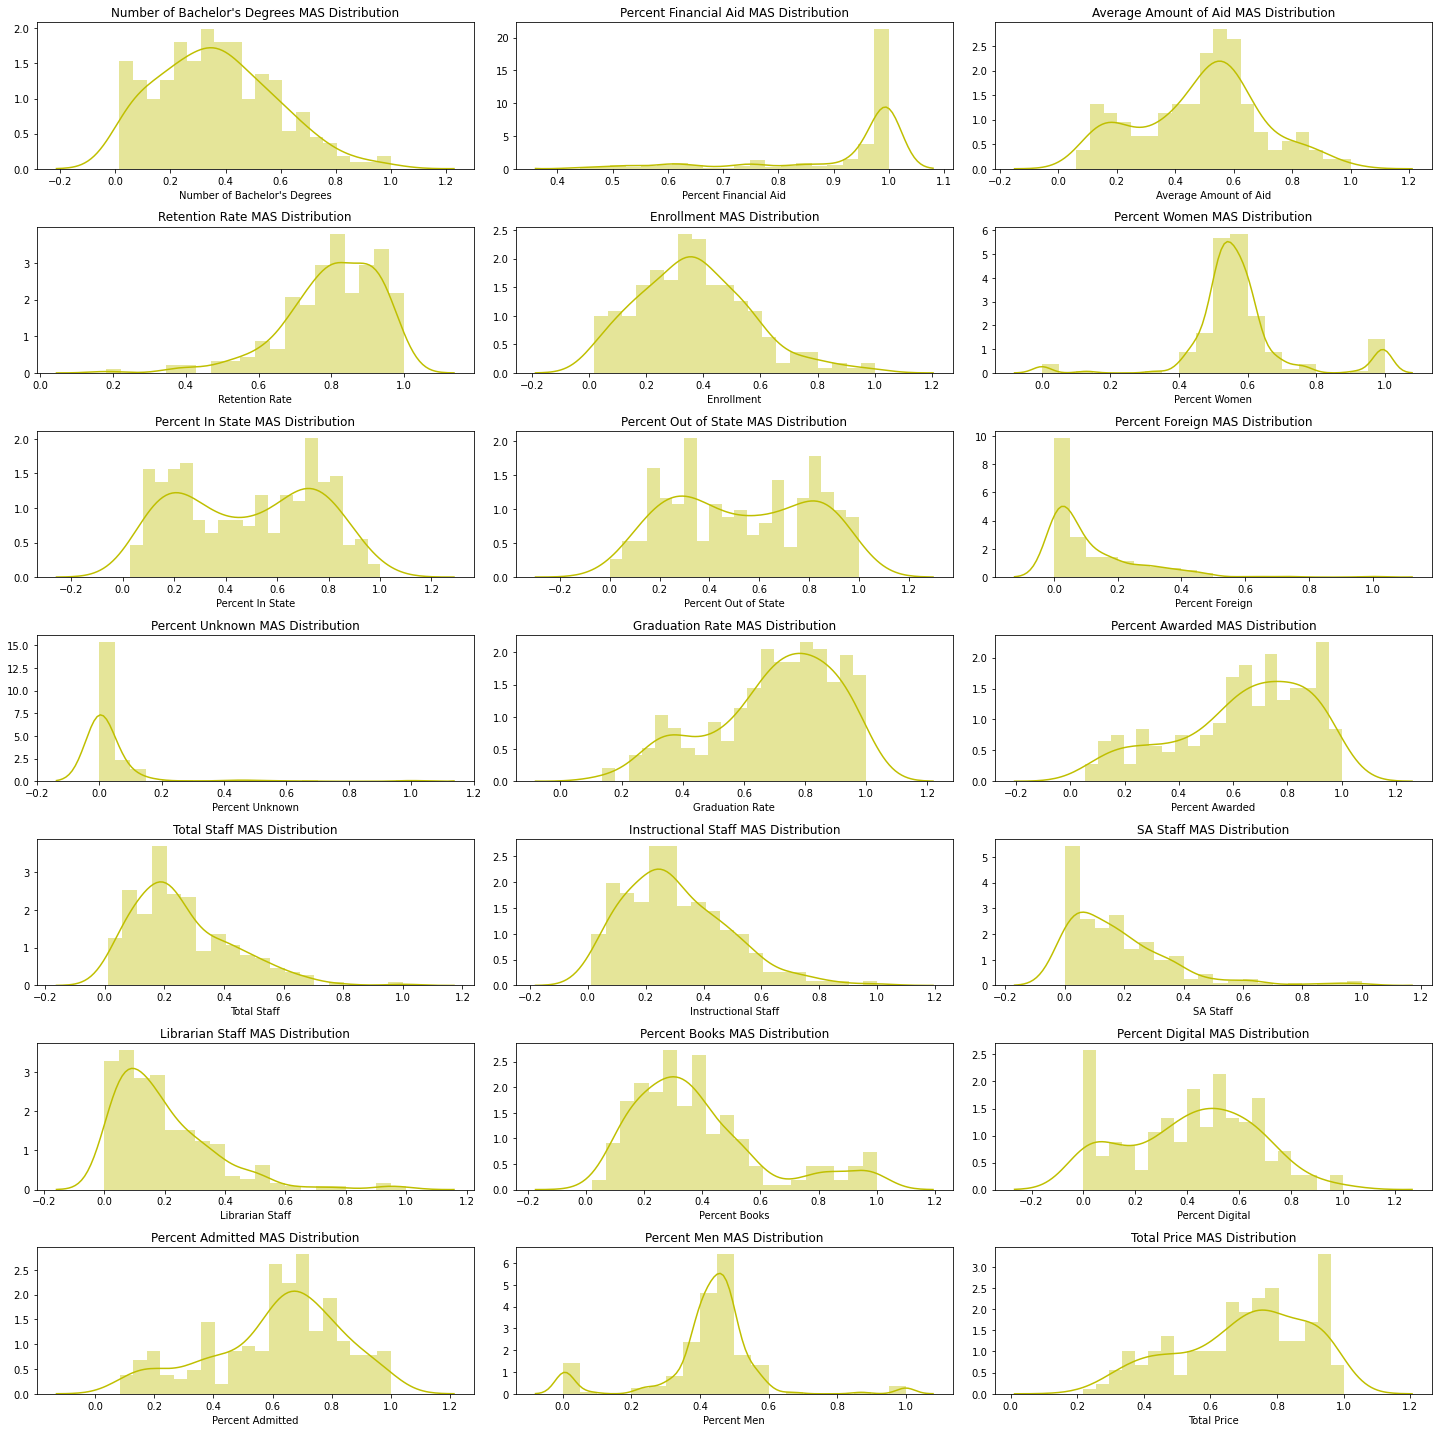

<Figure size 432x288 with 0 Axes>

In [93]:
fig=plt.figure(figsize=(20,20))
for key,column in enumerate(x.columns):
    #print(key)
    ax = fig.add_subplot(7,3,key+1)
    #xSS[column].hist(bins=20,ax=ax)
    sns.distplot(dfMAS[column],bins = 20, color = 'y')
    #dfMMS[column].hist(bins=20,ax=ax, color = 'r')
    ax.set_title(column + " MAS Distribution")
fig.tight_layout()
plt.show()
plt.savefig("./figs/MaxAbsScalerDistributions.png")

### All Scalers 
Below is a stacked representation of some of the scaled features along with the original distribution on the top

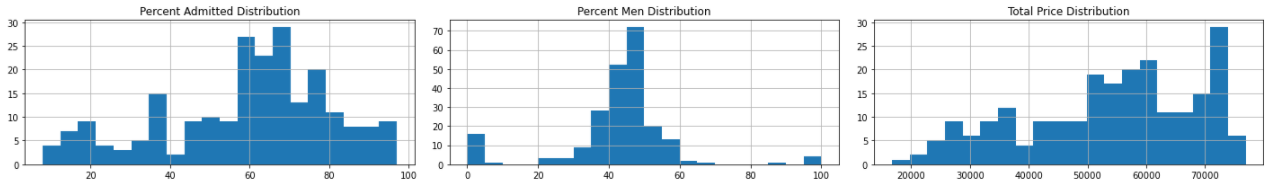
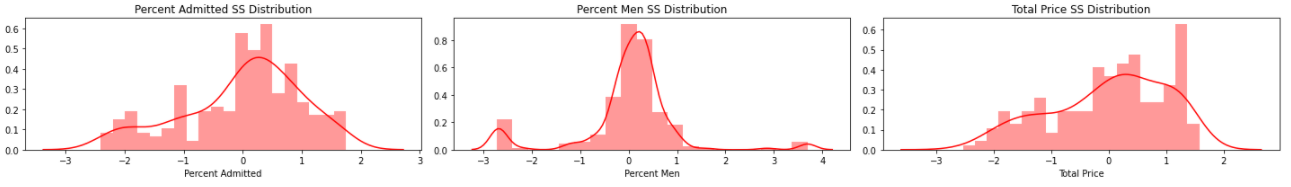
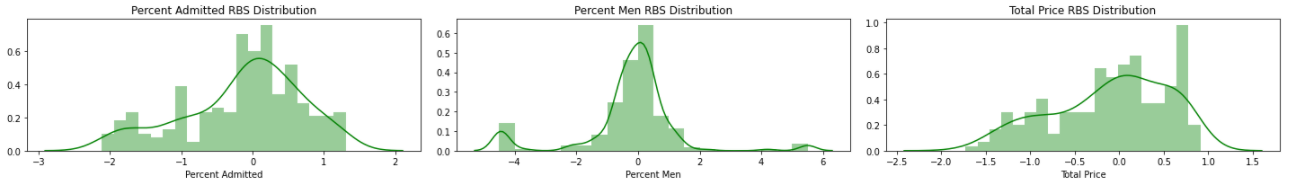
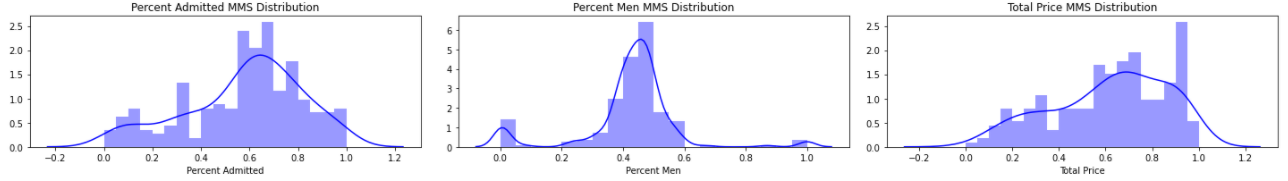
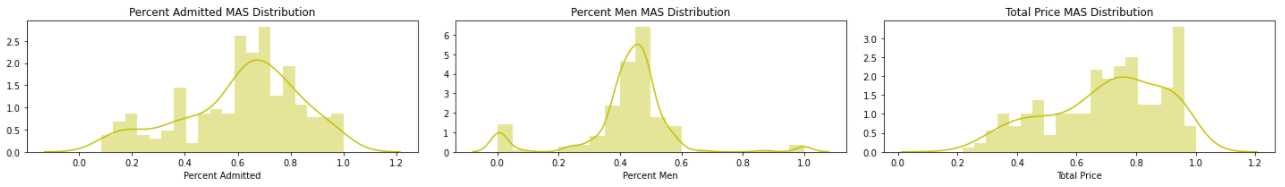

#### Conclusion

The linear relationships matrix allowed us to see which features were related and also give us ideas of features to use in a regression model. Since there are linearly related features with Total Price, a linear model could be effective. 

The distributions allowed us to see which data was normally distributed and which was skewed one way or another. For example our "Percent Foreign" and "Retention Rate" were skewed left and right, respectivally, while features like "Enrollment" were relatively normal. This allows us to see which features may effect the model more. 

Our normalized distributions allows us to visualize the effects of different normalizations and how those such as the Robust Scaler eliminated some outliers. However, the effects of the Robust Scaler can be seen to have similar effects as the Standard Scaler. Similary, there is little no difference between the MinMaxScaler and MaxAbsScaler. Thus, we can narrow down our normalization approaches to two types and ultimately see their effects on our model accuracy.